Plot the test results of different params in different models

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [2]:
import keras
from keras.layers import Input, Dense
from keras.models import Model
import keras.backend as K


import innvestigate
import innvestigate.utils as iutils

import numpy as np
import pandas as pd
import pickle

from sklearn import preprocessing

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


Feat mat

In [8]:
pklfile = '../../data/all_bands.pkl'
with open(pklfile, 'rb') as fi:
    data = pickle.load(fi)
data = preprocessing.MinMaxScaler().fit_transform(np.abs(data))

In [9]:
input_size = data.shape[1]

Plot funciton

In [3]:
def plotHis(his_list, labels, loss_y_top=0):
    plt.figure(figsize=(40,20))

    plt.subplot(1,2, 1)
    for his in his_list:
        plt.plot(his.history['loss'])
    plt.title('Models loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    if loss_y_top > 0:
        plt.ylim(top=loss_y_top)
    plt.legend(labels, loc='upper right')

    plt.subplot(1,2, 2)
    for his in his_list:
        plt.plot(his.history['acc'])
    plt.title('Models accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(labels, loc='upper right')

    plt.show()

Denoising models

In [5]:
picklepath = '../../data/models_dae_core.pkl'
with open(picklepath, 'rb') as fi:
    models_dae_core = pickle.load(fi)

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* 

In [23]:
m = models_dae_core[0][0]

In [24]:
m

In [19]:
m.history

AttributeError: 'Model' object has no attribute 'history'

In [22]:
modelpath = '../../models/model_dae_core_2048.mdl'
m1 = keras.models.load_model(modelpath)

In [30]:
idx = 1234
m.compile(optimizer='adam', loss='mse',metrics=['accuracy'])
# decoded = m.predict(data[idx].reshape(1,input_size,))

In [31]:
decoded = m.predict(data)

InternalError: GPU sync failed

In [3]:
pklpath = '../../data/history_dae_core.pkl'
with open(pklpath, 'rb') as fi:
    his = pickle.load(fi)

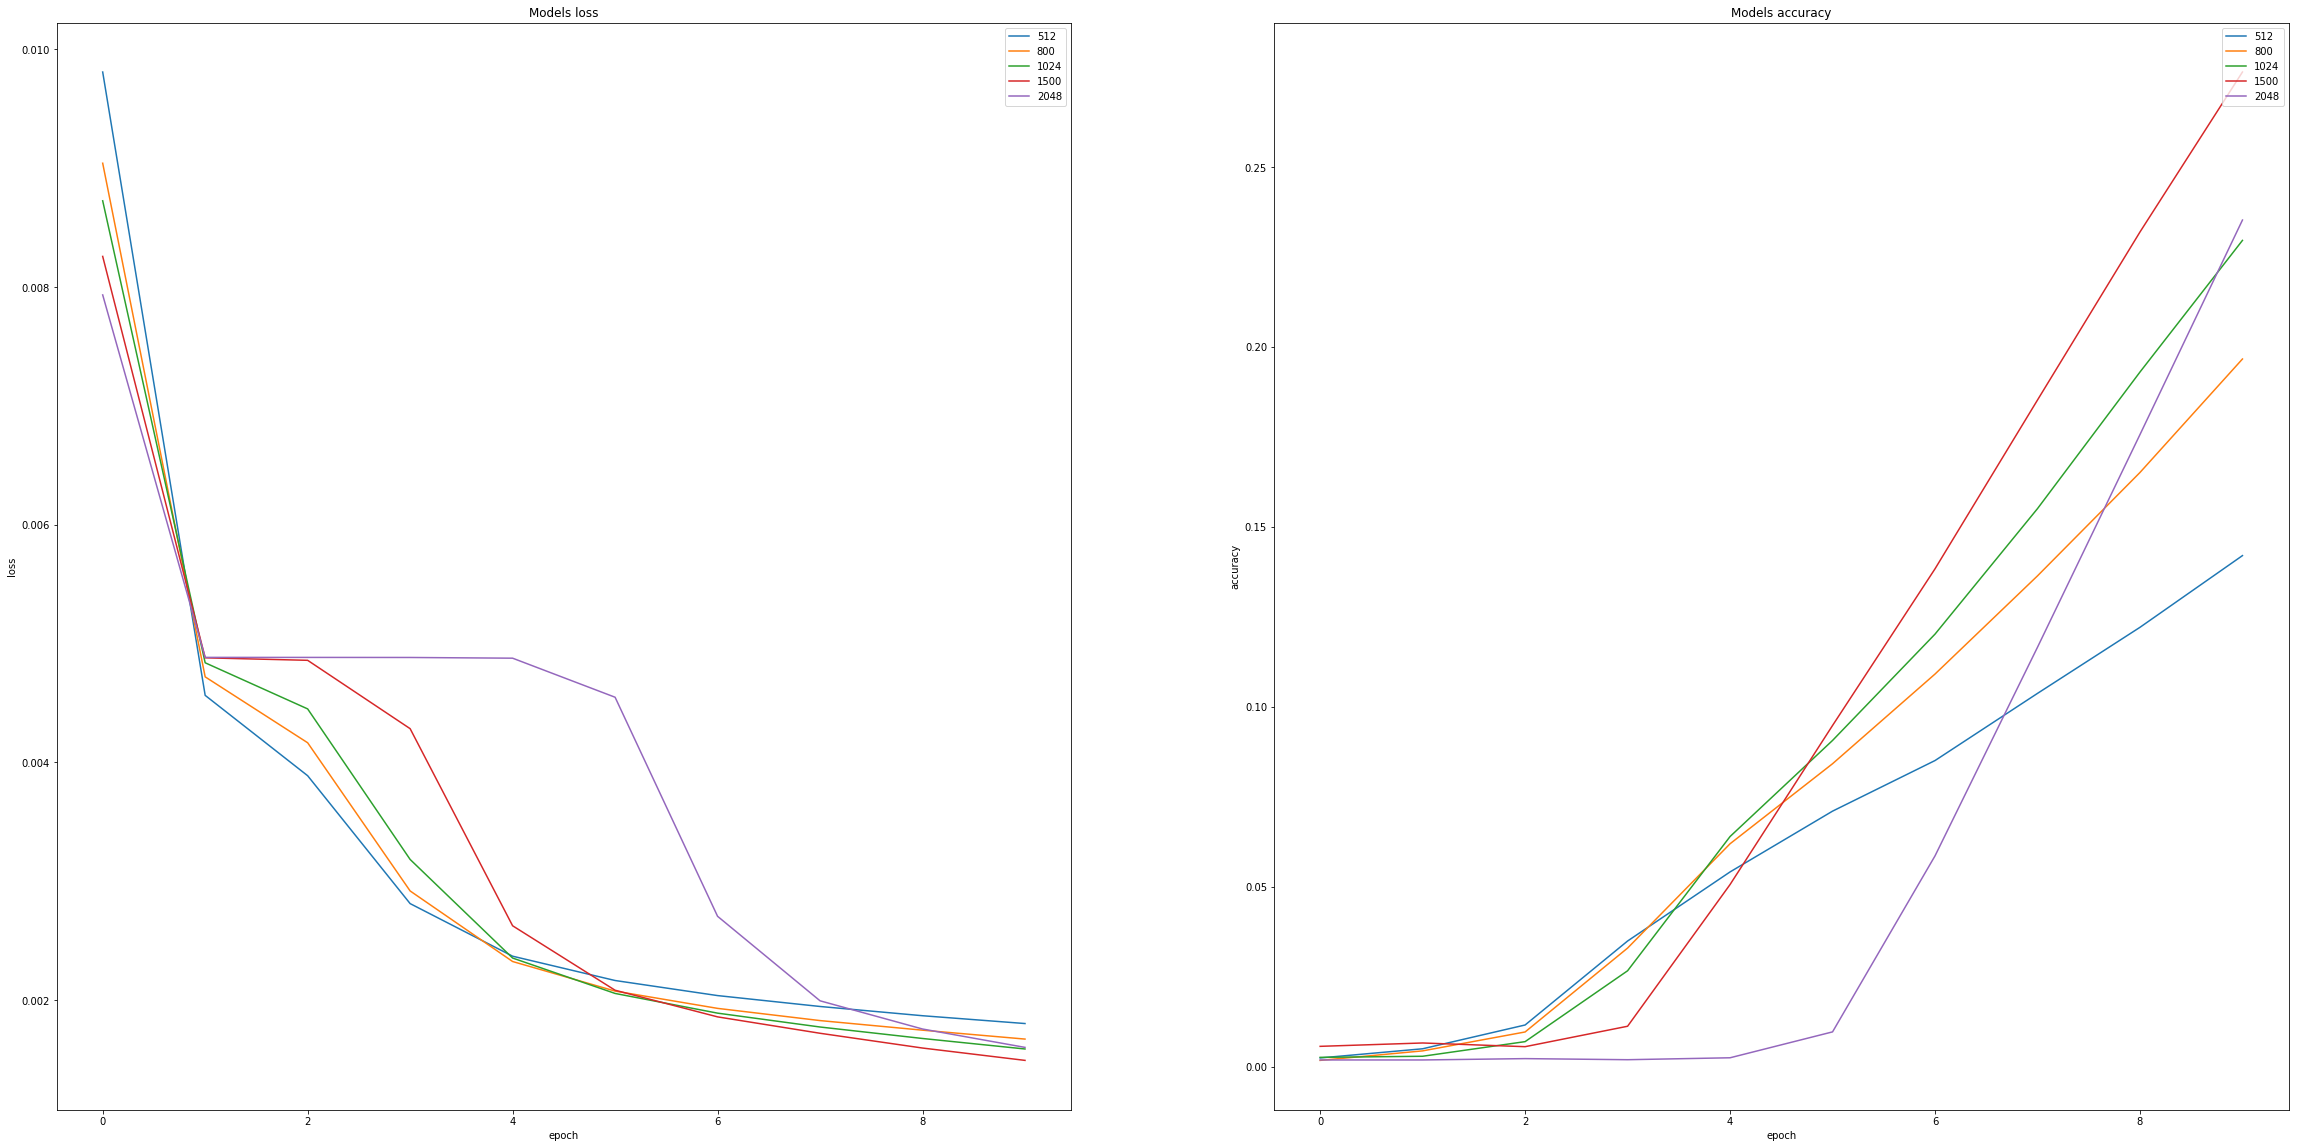

In [6]:
plotHis(his, [512, 800, 1024, 1500, 2048] )

In [7]:
modelpath = '../../models/model_dae_core_2048.mdl'
m = keras.models.load_model(modelpath)

In [10]:
idx = 1234
decoded = m.predict(data[idx].reshape(1,input_size,))

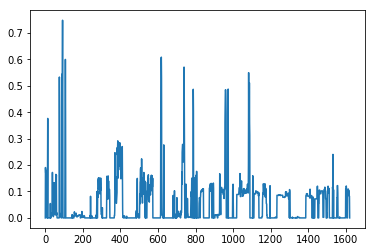

In [11]:
sns.lineplot(x=range(input_size),y=data[idx])

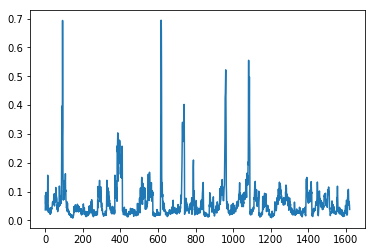

In [13]:
sns.lineplot(x=range(input_size),y=decoded[0])

In [4]:
picklepath = '../../data/history_cae.pkl'
with open(picklepath, 'rb') as fi:
    cae_hist = pickle.load(fi)

ValueError: Unknown loss function:contractive_loss